EXAMEN GRAPHICS

RAY AND PLANE EQUATIONS





In [32]:
import numpy as np

def ray_plane_equations(ray_origin, ray_direction, plane_point, plane_normal):
    # Ray equation: r = o + td, where r is a point on the ray, o is the origin, d is the direction, t is a parameter
    ray_equation = f"Ray: r = {ray_origin} + t*{ray_direction}"

    # Plane equation: (p - p0) ⋅ n = 0, where p is a point in the plane, p0 is a point belonging to the plane, n is the normal vector
    plane_equation = f"Plane: ({ray_origin} - {plane_point}) ⋅ {plane_normal} = 0"

    return ray_equation, plane_equation

# Variables to update:
##o
ray_origin = np.array([0, 0, 0])
##d
ray_direction = np.array([1, 1, 1])
##p_0
plane_point = np.array([0, 0, 1])
##N
plane_normal = np.array([0, 0, 1])

ray_eq, plane_eq = ray_plane_equations(ray_origin, ray_direction, plane_point, plane_normal)
print("Ray Equation:", ray_eq)
print("Plane Equation:", plane_eq)



Ray Equation: Ray: r = [0 0 0] + t*[1 1 1]
Plane Equation: Plane: ([0 0 0] - [0 0 1]) ⋅ [0 0 1] = 0


INTERSECTION RAY – PLANE

P_HIT

In [33]:
import numpy as np

def ray_plane_intersection(ray_origin, ray_direction, plane_point, plane_normal):
    # Calculate the dot product of ray direction and plane normal
    #d·n
    d_n = np.dot(ray_direction, plane_normal)
   #Check if the ray is parallel to the plane (d_n is zero)
    if np.isclose(d_n, 0):
        # Ray#  is parallel to the plane, no intersection
        return#  Noneq

    # Calculate t_hit and intersection point
    t_hit = np.dot(plane_point - ray_origin, plane_normal) / d_n
    intersection_point = ray_origin + t_hit * ray_direction
    #t_hit,
    return  intersection_point #, t_hit



# Example usage:
ray_origin = np.array([0, 0, 0])
ray_direction = np.array([1, 1, 1])  # Should be a unit vector
plane_point = np.array([0, 0, 1])
plane_normal = np.array([0, 0, 1])  # Should be a unit vector
#t_hit,
p_hit_prova = ray_plane_intersection(ray_origin, ray_direction, plane_point, plane_normal)

# if t_hit is not None:
#     print("There IS an intersection:")
#     print("Intersection Parameter (t_hit):", t_hit)
#     print("Intersection Point (p_hit):", p_hit_prova)
# else:
#     print("NO intersection.")
#     print("No solution ir infinite solutions")


PLANE OF THE TRIANGLE

di ens donden un tetadre q son 4 punts basicament haurem de fer aquesta funció per els 3 triangles que formen els 4 punts

EXEMPLE: si tenim els punts A B C i D
Els triangles son:

A,B,C

A,B,D

A,C,D

B,C,D

In [34]:
import numpy as np

def compute_triangle_plane(p_A, p_B, p_C):
    # Compute the normal vector to the plane
    normal = np.cross(p_B - p_A, p_C - p_A)

    # Point on the plane (for instance, p_0 = p_A)
    ###CHANGED FOR EVERY EXERCISE
    plane_point = p_A

    return normal, plane_point

def is_point_inside_triangle(p_hit, p_A, p_B, p_C):
    # Compute normal to the triangle pointing inwards
    normal, _ = compute_triangle_plane(p_A, p_B, p_C)

    # Compute normals to the sides of the triangle pointing inwards
    normal_AB = np.cross(p_B - p_A, p_hit - p_A)
    normal_BC = np.cross(p_C - p_B, p_hit - p_B)
    normal_CA = np.cross(p_A - p_C, p_hit - p_C)

    # Check if the point is inside the triangle (using dot product)
    is_inside = (np.dot(normal_AB, normal) >= 0) and (np.dot(normal_BC, normal) >= 0) and (np.dot(normal_CA, normal) >= 0)

    return is_inside

# Example usage:
p_A = np.array([0, 0, 0])
p_B = np.array([1, 0, 0])
p_C = np.array([0, 1, 0])
p_hit = np.array([0.5, 0.5, 0])  # Example point to check

# Check if the point is inside the triangle
is_inside = is_point_inside_triangle(p_hit, p_A, p_B, p_C)
if is_inside:
    print("Point is inside the triangle.")
else:
    print("Point is outside the triangle.")



Point is inside the triangle.


POINT ON EDGE / INSIDE EDGE / OUTSIDE EDGE

per comprovar si el punt esta a sobre d'una linea

In [35]:
import numpy as np

def is_point_on_edge(p, edge_start, edge_end, tolerance=1e-10):
    # Calculate vectors from the edge vertices to the point
    vector1 = p - edge_start
    vector2 = p - edge_end

    # Calculate dot products to determine barycentric coordinates
    dot_product1 = np.dot(vector1, vector2)
    dot_product2 = np.dot(vector1, vector1)

    # Calculate squared distances from the point to the vertices
    dist_start_squared = np.dot(vector1, vector1)
    dist_end_squared = np.dot(vector2, vector2)

    # Check if the point is within the tolerance of the edge
    if np.abs(dot_product1 * dot_product1 - dot_product2 * dist_end_squared) < tolerance and dist_start_squared < dist_end_squared:
        return "On Edge"
    elif dot_product1 <= 0:
        return "Outside Edge"
    elif dot_product1 >= dot_product2:
        return "Outside Edge"
    else:
        return "Inside Edge"

# Example usage:
edge_start = np.array([0, 0, 0])
edge_end = np.array([1, 0, 0])

# Point to check
p = np.array([0.5, 0, 5])  # Example point to check

result = is_point_on_edge(p, edge_start, edge_end)
print("Result:", result)


Result: Inside Edge


INTERSECTION RAY – SPHERE

In [36]:
import numpy as np

def ray_sphere_intersection(ray_origin, ray_direction, sphere_center, sphere_radius):
    a = np.dot(ray_direction, ray_direction)
    b = 2 * np.dot(ray_origin - sphere_center, ray_direction)
    c = np.dot(ray_origin - sphere_center, ray_origin - sphere_center) - sphere_radius**2

    discriminant = b**2 - 4*a*c

    if discriminant < 0:
        # No intersection points
        return None
    elif discriminant == 0:
        # One intersection point (tangent ray)
        t = -b / (2*a)
        intersection_point = ray_origin + t * ray_direction
        return [intersection_point]
    else:
        # Two intersection points
        t1 = (-b + np.sqrt(discriminant)) / (2*a)
        t2 = (-b - np.sqrt(discriminant)) / (2*a)
        intersection_point1 = ray_origin + t1 * ray_direction
        intersection_point2 = ray_origin + t2 * ray_direction
        return [intersection_point1, intersection_point2]

# Example usage:
ray_origin = np.array([0, 0, 0])
ray_direction = np.array([1, 1, 1])  # Should be a unit vector
sphere_center = np.array([1, 1, 1])
sphere_radius = 1

intersection_points = ray_sphere_intersection(ray_origin, ray_direction, sphere_center, sphere_radius)

if intersection_points:
    print("Intersection Points:")
    for point in intersection_points:
        print(point)
else:
    print("No intersection.")


Intersection Points:
[1.57735027 1.57735027 1.57735027]
[0.42264973 0.42264973 0.42264973]


**EXERCISES**

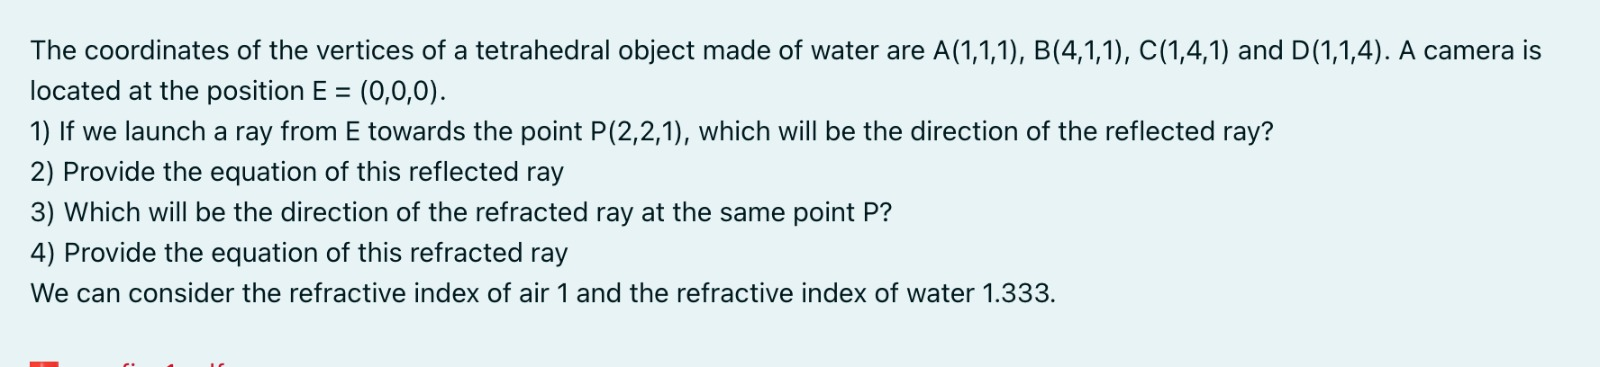

In [37]:
from PIL import Image
from IPython.display import display

img = Image.open("./Fotos/foto1.jpeg")
display(img)

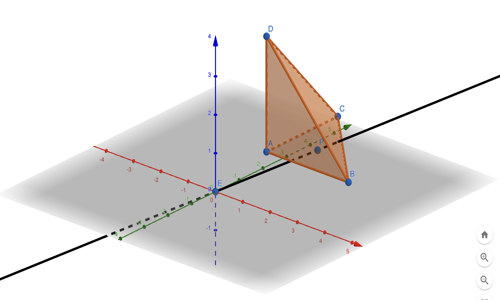

In [38]:
img2 = Image.open("./Fotos/3dEx1.png")
img2rez = img2.resize([500,300])
display(img2rez)

**1. DIRECTION**

**2. EQUATION OF THE REFLECTED RAY**

**3. DIRECTION OF THE REFRACTED RAY AT POINT P**

**4. EQUATION OF THE REFRACTED RAY AT POINT P**

<font color='red'>RECORDAR CANVIAR ELS VÈRTEX A L'HORA DE CALCULAR LA N (FER SERVIR GEOGEBRA PER SABER EL PLA) AMB L'ORDRE ADEQUAT</font>

OUTSIDE tetrahedron

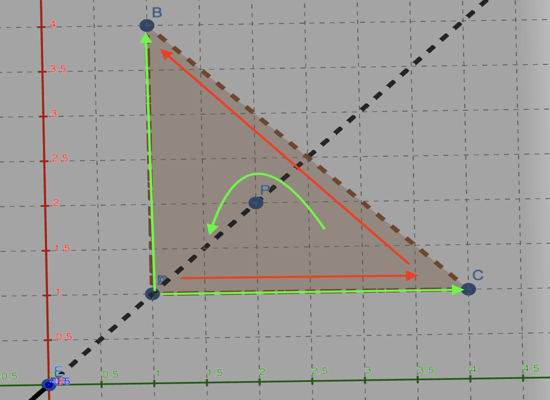

In [39]:
img6 = Image.open("./Fotos/foto12.jpeg")
img6rz = img6.resize([550,400])
display(img6rz)

<font color='red'>Per tal de calcular correctament la normal, mirem quina direcció ens interessa. En aquest cas volem que surti del paper (vist en 2D) o que vagi cap abaix (vist en 3D), ja que així anirà cap a fora del triangle. Això ho farem amb el mètode de la mà dreta en una espira, que donat el sentit de rotació (amb els 4 dits de la mà dreta) obtenim la direcció del vector normal (amb el dit polze)

A --> C-A, B-A

C --> B-C, A-C

B --> A-B, C-B

𝒏 = (FINAL - ORIGEN) × (FINAL - ORIGEN) </font>

In [40]:
#COSES A CANVIAR
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
vertexA = np.array([1,1,1])
vertexB = np.array([4,1,1])
vertexC = np.array([1,4,1])
vertexD = np.array([1,1,4])

cameraPosition = np.array([0,0,0])

pointP = np.array([2,2,1])

n1= 1
n2 = 1.333


n = np.cross(vertexA - vertexB, vertexC - vertexB)
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# l = point - cameraPosw
#DIRECCIÓ INNWARDS DEL RAIG = w_i
##E-P
l = cameraPosition - pointP
magnitudl = np.linalg.norm(l)
l_normalizada = l/magnitudl
# Compute the normal vector to the plane


print("Normal:", n)
# Calcular la magnitud del vector
magnitud = np.linalg.norm(n)
# Normalizar el vector
n_normalizado = n / magnitud
print("Normalized n: ", n_normalizado)
#reflected ray direction (DIAPO 59)
reflectedRayDir = 2 * (l_normalizada * n_normalizado) * n_normalizado - l_normalizada
print("1) DIRECTION REFLECTED RAY:",reflectedRayDir)

# r = o + td                  0 < t < inf
# CALCULAR P_HIT (DIAPO 15)
p_hit_2 =  ray_plane_intersection(cameraPosition, l_normalizada, vertexA, n_normalizado)
print("2) EQUATION OF THE REFLECTED RAY: r = ",p_hit_2, " + t *",reflectedRayDir)


#refracted = w_t = t (DIAPO 61 - 62 -63)
#n1 = medi d'on surt el raig
#n2 medi on entra el raig o el que creua

nt = n1/n2

#(np.sin(alpha))^2) = 1 - (l*n)^2
t = (- np.sqrt(1-(pow(nt,2))*(1 - pow((l_normalizada*n_normalizado),2)))+nt*(l_normalizada*n_normalizado))*n_normalizado - nt*l_normalizada
print("3) DIRECTION OF THE REFRACTED RAY AT POINT P:",t)

# r = o + td                  0 < t < inf
print("4) EQUATION OF THE REFRACTED RAY AT POINT P: r = ",p_hit_2, " + t *",t)



Normal: [ 0  0 -9]
Normalized n:  [ 0.  0. -1.]
1) DIRECTION REFLECTED RAY: [ 0.66666667  0.66666667 -0.33333333]
2) EQUATION OF THE REFLECTED RAY: r =  [2. 2. 1.]  + t * [ 0.66666667  0.66666667 -0.33333333]
3) DIRECTION OF THE REFRACTED RAY AT POINT P: [0.50012503 0.50012503 0.70692992]
4) EQUATION OF THE REFRACTED RAY AT POINT P: r =  [2. 2. 1.]  + t * [0.50012503 0.50012503 0.70692992]


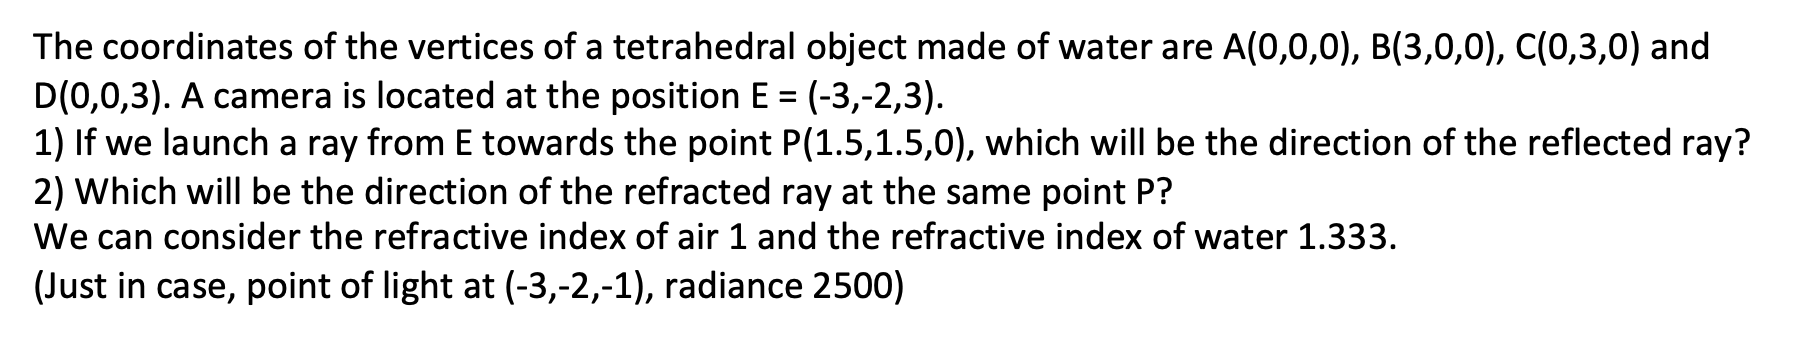

In [41]:
img8 = Image.open("./Fotos/foto13.jpeg")
display(img8)

In [42]:
#COSES A CANVIAR
#---------------------------------------------
vertexA = np.array([0,0,0])
vertexB = np.array([3,0,0])
vertexC = np.array([0,3,0])
vertexD = np.array([0,0,3])

cameraPosition = np.array([-3,-2,-3])

pointP = np.array([1.5,1.5,0])

n1 = 1
n2 = 1.333
#---------------------------------------------

# l = point - cameraPos
#DIRECCIÓ INNWARDS DEL RAIG = w_i
##E-P
l = cameraPosition - pointP
magnitudl = np.linalg.norm(l)
l_normalizada = l/magnitudl
# Compute the normal vector to the plane
n = np.cross(vertexA - vertexB, vertexC - vertexB)
print("Normal:", n)
# Calcular la magnitud del vector
magnitud = np.linalg.norm(n)
print("Magnitud:", magnitud)
# Normalizar el vector
n_normalizado = n / magnitud
print(n_normalizado)
#reflected ray direction (DIAPO 59)
reflectedRayDir = 2 * (l_normalizada * n_normalizado) * n_normalizado - l_normalizada
print("1) DIRECTION REFLECTED RAY:",reflectedRayDir)

# r = o + td                  0 < t < inf
p_hit_ =  ray_plane_intersection(cameraPosition, l_normalizada, vertexA, n_normalizado)

print("2) EQUATION OF THE REFLECTED RAY: r = ",p_hit_, " + t *",reflectedRayDir)


#refracted = w_t = t (DIAPO 61 - 62)
#n1 = medi d'on surt el raig
#n2 medi on entra el raig o el que creua

nt = n1/n2

#(np.sin(alpha))^2) = 1 - (l*n)^2
t = (- np.sqrt(1-pow(nt,2)*(1 - pow((l_normalizada*n_normalizado),2)))+nt*(l_normalizada*n_normalizado))*n_normalizado - nt*l_normalizada
print("3) DIRECTION OF THE REFRACTED RAY AT POINT P:",t)

# r = o + td                  0 < t < inf
print("4) EQUATION OF THE REFRACTED RAY AT POINT P: r = ",p_hit_, " + t *",t)





Normal: [ 0  0 -9]
Magnitud: 9.0
[ 0.  0. -1.]
1) DIRECTION REFLECTED RAY: [ 0.69853547  0.54330537 -0.46569032]
2) EQUATION OF THE REFLECTED RAY: r =  [1.5 1.5 0. ]  + t * [ 0.69853547  0.54330537 -0.46569032]
3) DIRECTION OF THE REFRACTED RAY AT POINT P: [0.52403261 0.40758092 0.74784197]
4) EQUATION OF THE REFRACTED RAY AT POINT P: r =  [1.5 1.5 0. ]  + t * [0.52403261 0.40758092 0.74784197]


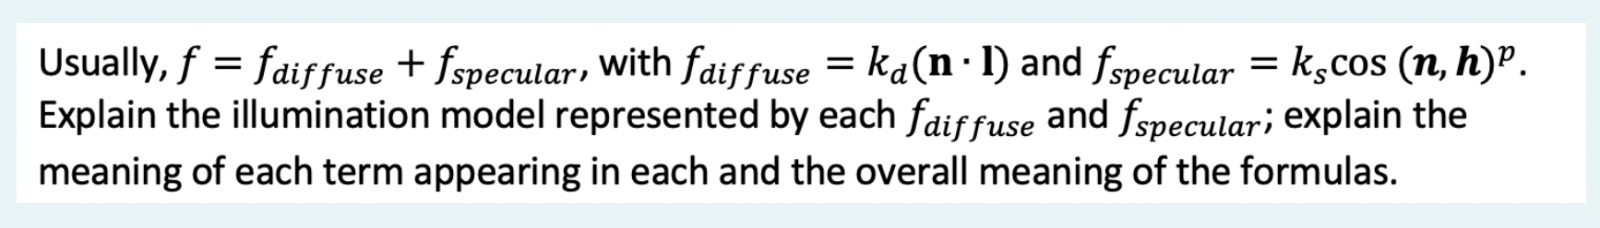

In [43]:
img3 = Image.open("./Fotos/foto3.jpeg")
display(img3)

<font color='cyan'>DIAPO 55

f_diffuse = k_d * (n*l) -> diffuse reflection is the same in every direction(Lambert model)

K_d is the diffuse colour of the point, it also depends on the wavelength. 

(n*l) takes into account the efficiency of the radiance on the surface. (see right the appearance of perfect diffuse reflection)



The most basic specular model is glossy reflection, where (Blinn-Phong model) f_specular = k_s*cos(n,h)^p

h = (l+v)/(||l+v||) 

p is the glossines coefficient and 

𝑘_s the specular colour of the point. 

(see below diagrams of glossy reflection, below right and right the effect of decreasing p)</font>


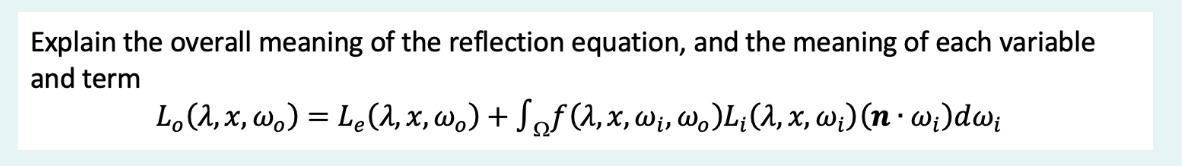

In [44]:
img4 = Image.open("./Fotos/foto7.jpeg")
display(img4)

outgoing direction as 𝜔_0 - 
incoming direction(s) as 𝜔_i - 
x is the point - 
𝜆 the light


For the rendering equation presented the most common approximation is using MonteCarlo methods for the integral.
We perform random sampling of the directions, and then the integral can be approximately computed as a sum


L_e() = CORRESPONDS TO THE RADIANCE THAT IS BEING EMITTED, SO REPRESENTS ALL OF THE POSSIBLE RAYS AND DISTRIBUTIONS.
 
f() = IS THE BIDIRECTIONAL REFLECTANCE DISTRIBUTION FUNCTION (DIFFERENT FOR EACH MATERIAL BECAUSE IT DEPENDS ON HOW IT REFLECTS THE LIGHT)

L_i() = IS THE INCOMING RADIANCE WHICH IS THE LIGHT COMING FROM THE SOURCE

dw_i = IS THE ANGLE IN THE DIRECTION OF THE LIGHT

----------


IKER EXPLANATION:
The outgoing radiance at a point is computed from the radiance incoming from every direction (long formula with the 𝜆 x l v n....)
where Li(p) = I_l / d^2   <- d = ||P - P_l||
and v = visibility which will be v(p)=0 if the light is not visible and v(p)=1 otherwise.
Ω = hemisphere at point "x"
𝜆 = wavelength of the light
l = incoming direction
v = outgoing direction
n = normal to the surface at point "x"
dwi = solid angle in the incoming direction "l"
f(𝜆,x,l,v) = BRDF and depends on the material

but for this exercise we will use the terminology f(𝜆,x,wi,wo) therefore the equation will be expressed as: (formula del enunciat)
in which:
l has been denoted as wi = incoming direction(s)
v has been denoted as wo = outgoing direction(s)
the BRDF is denoted as f(𝜆,x,wi,wo)

In order to solve the integral we use Montecarlo methods approximation by performing random sampling of the directions "l" and computing the integral approximation as a sum, with a slow convergence. Montecarlo methods approximations can be improved using anti-aliasing.


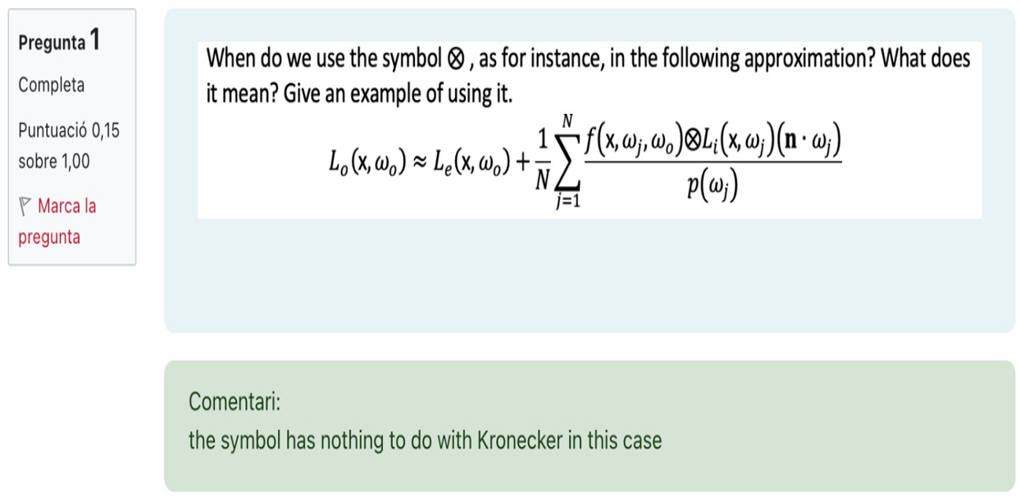

In [45]:
img5 = Image.open("./Fotos/foto8.jpeg")
img5rez = img5.resize([1020,500])
display(img5rez)

<font color='yellow'> DIAPO 45: Remark that we use ⨂ to denote multiplication for each of the three RGB channels instead of the wavelenghts

<font color='yellow'> In the following approximation of the Montecarlo method we use this symbol to denote multiplication for each of the three RGB channels instead of the wavelengths.